In [93]:
## Importing Libraries
import pandas as pd
import numpy as np
import metpy as mp
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

In [175]:
#df = pd.read_csv('/Volumes/T7/CCAP/Data/outliers_area.csv')
df_tb = pd.read_csv('/Users/kenneth/Documents/CCAP_Research/Data/outliers_TB.csv')

three_hr_cells = df_tb['cell'].nunique() # Counting unqiue cell values

In [176]:
df_tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73787 entries, 0 to 73786
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   feature        73787 non-null  int64  
 1   time           73787 non-null  object 
 2   latitude       73787 non-null  float64
 3   longitude      73787 non-null  float64
 4   cell           73787 non-null  int64  
 5   time_cell      73787 non-null  object 
 6   minTB_feature  71282 non-null  float64
 7   minTB_cell     73787 non-null  float64
 8   maxTB_feature  71282 non-null  float64
 9   maxTB_cell     73787 non-null  float64
 10  avgTB_feature  71282 non-null  float64
 11  avgTB_cell     73787 non-null  float64
 12  area (km)      71732 non-null  float64
 13  max_area_cell  73787 non-null  float64
 14  hours          63576 non-null  float64
 15  lifetime       73787 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memory usage: 9.0+ MB


In [177]:
# Check for NaN values in the hours column and dropping them
has_nans = df_tb['hours'].isna().sum()
has_nans
df_tb = df_tb.dropna(subset=['hours'])
df_tb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63576 entries, 0 to 73782
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   feature        63576 non-null  int64  
 1   time           63576 non-null  object 
 2   latitude       63576 non-null  float64
 3   longitude      63576 non-null  float64
 4   cell           63576 non-null  int64  
 5   time_cell      63576 non-null  object 
 6   minTB_feature  61346 non-null  float64
 7   minTB_cell     63576 non-null  float64
 8   maxTB_feature  61346 non-null  float64
 9   maxTB_cell     63576 non-null  float64
 10  avgTB_feature  61346 non-null  float64
 11  avgTB_cell     63576 non-null  float64
 12  area (km)      61752 non-null  float64
 13  max_area_cell  63576 non-null  float64
 14  hours          63576 non-null  float64
 15  lifetime       63576 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memory usage: 8.2+ MB


In [178]:
## subsetting the data by condition. We are interested in cells that existed for more than 
## 1 data point so we are ignoring all cells that only have 3 hours of lifetime or less

df_tb_6 = df_tb[df_tb['lifetime'] > 3]

six_hr_cells = df_tb_6['cell'].nunique()

print(f'Number of cells that have 3 or more hours of data: {three_hr_cells}, Number of cells that have 6 or more hours of data: {six_hr_cells}, Number of cells that have no more than 3 hours of data(Discarding): {three_hr_cells-six_hr_cells}')

Number of cells that have 3 or more hours of data: 11489, Number of cells that have 6 or more hours of data: 9400, Number of cells that have no more than 3 hours of data(Discarding): 2089


### Investigating cells with lifespans of at least 27 hours

In [179]:
df_tb_27 = df_tb[df_tb['lifetime'] >= 27]

In [180]:
# Create a GeoDataFrame from your Pandas DataFrame
gdf_tb_27 = gpd.GeoDataFrame(df_tb_27, 
                      geometry=gpd.points_from_xy(df_tb_27.longitude, df_tb_27.latitude))

<AxesSubplot:>

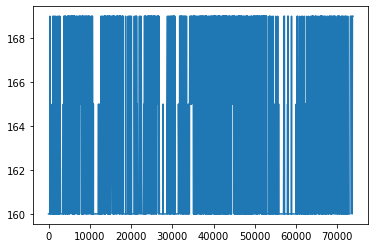

In [181]:
## Plotting the minumum Temperature Brightness Values across the entire 27 hour minimum cell data frame
## All of the values are between 160 and 170
gdf_tb_27['minTB_cell'].plot()

In [182]:
## Investigating the 
df_tb_27['minTB_cell'].nunique()

3

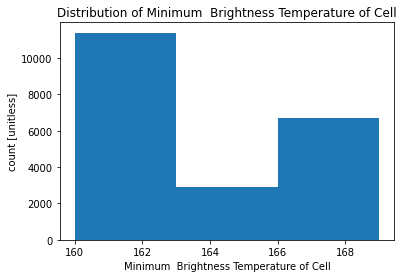

In [183]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))  
n = len(gdf_tb_27['minTB_cell'])
sqrt_n = int(n ** 0.5)

ax.hist(gdf_tb_27['minTB_cell'], bins=3)  
ax.set_xlabel('Minimum  Brightness Temperature of Cell')
ax.set_ylabel('count [unitless]')
ax.set_title('Distribution of Minimum  Brightness Temperature of Cell')
plt.show() 

In [184]:
gdf_tb_27[0:9].info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9 entries, 6 to 14
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   feature        9 non-null      int64   
 1   time           9 non-null      object  
 2   latitude       9 non-null      float64 
 3   longitude      9 non-null      float64 
 4   cell           9 non-null      int64   
 5   time_cell      9 non-null      object  
 6   minTB_feature  9 non-null      float64 
 7   minTB_cell     9 non-null      float64 
 8   maxTB_feature  9 non-null      float64 
 9   maxTB_cell     9 non-null      float64 
 10  avgTB_feature  9 non-null      float64 
 11  avgTB_cell     9 non-null      float64 
 12  area (km)      9 non-null      float64 
 13  max_area_cell  9 non-null      float64 
 14  hours          9 non-null      float64 
 15  lifetime       9 non-null      int64   
 16  geometry       9 non-null      geometry
dtypes: float64(11), geometry(1), i

In [239]:
test = gdf_tb_27[0:30]
test

,feature,time,latitude,longitude,cell,time_cell,minTB_feature,minTB_cell,maxTB_feature,maxTB_cell,avgTB_feature,avgTB_cell,area (km),max_area_cell,hours,lifetime,geometry
6,24303,1983-07-09 00:00:00,15.356931,271.79623,10791,0 days 00:00:00,192.0,160.0,244.5,244.5,227.51727,218.23146,161.996410,559.05774,0.0,27,POINT (271.796 15.357)
7,24304,1983-07-09 03:00:00,15.489045,268.54138,10791,0 days 03:00:00,206.3,160.0,244.5,244.5,225.50972,218.23146,244.730700,559.05774,3.0,27,POINT (268.541 15.489)
8,24305,1983-07-09 06:00:00,14.469756,265.70886,10791,0 days 06:00:00,201.0,160.0,240.1,244.5,211.98695,218.23146,52.453762,559.05774,6.0,27,POINT (265.709 14.470)
9,24306,1983-07-09 09:00:00,12.447395,263.80090,10791,0 days 09:00:00,192.0,160.0,244.5,244.5,206.95406,218.23146,66.805046,559.05774,9.0,27,POINT (263.801 12.447)
10,24307,1983-07-09 12:00:00,11.253166,261.50388,10791,0 days 12:00:00,197.5,160.0,241.0,244.5,219.51176,218.23146,45.373734,559.05774,12.0,27,POINT (261.504 11.253)
11,24308,1983-07-09 15:00:00,10.850642,260.11343,10791,0 days 15:00:00,192.0,160.0,242.8,244.5,215.57346,218.23146,117.092210,559.05774,15.0,27,POINT (260.113 10.851)
12,24309,1983-07-09 18:00:00,10.648044,258.27713,10791,0 days 18:00:00,183.0,160.0,244.5,244.5,213.97174,218.23146,461.304840,559.05774,18.0,27,POINT (258.277 10.648)
13,24310,1983-07-09 21:00:00,11.295175,258.29208,10791,0 days 21:00:00,216.7,160.0,216.7,244.5,216.70000,218.23146,11.007353,559.05774,21.0,27,POINT (258.292 11.295)
14,24311,1983-07-10 00:00:00,11.186483,259.92477,10791,1 days 00:00:00,160.0,160.0,244.5,244.5,214.51859,218.23146,559.057740,559.05774,24.0,27,POINT (259.925 11.186)
15,24312,1983-07-10 03:00:00,10.962808,262.39642,10791,1 days 03:00:00,192.0,160.0,244.5,244.5,230.07108,218.23146,186.659300,559.05774,27.0,27,POINT (262.396 10.963)


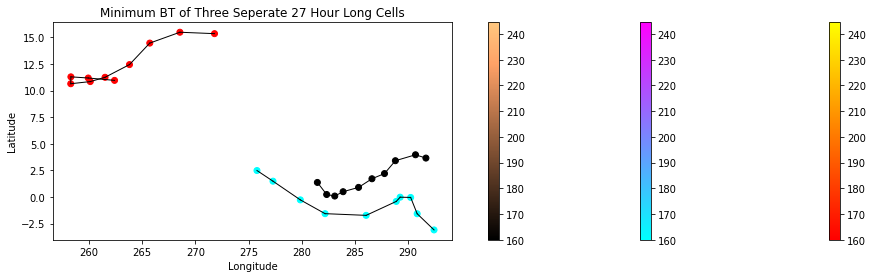

In [255]:
# create figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))

cell1 = gdf_tb_27[0:10]
cell2 = gdf_tb_27[10:20]
cell3 = gdf_tb_27[20:30]

ax.set_title('Minimum BT of Three Seperate 27 Hour Long Cells')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


min_value = gdf_tb_27['minTB_cell'].min()
max_value = gdf_tb_27['maxTB_cell'].max()


ax = cell1.plot(column='minTB_cell', cmap='autumn', legend=True, ax=ax, vmin=min_value, vmax=max_value)
ax2 = cell2.plot(column='minTB_cell', cmap='cool', legend=True, ax=ax, vmin=min_value, vmax=max_value)
ax3 = cell3.plot(column='minTB_cell', cmap='copper', legend=True, ax=ax, vmin=min_value, vmax=max_value)

# Connect the data points in each cell with lines
for cell in [cell1, cell2, cell3]:
    for i in range(len(cell) - 1):
        lon1, lat1 = cell.iloc[i]['geometry'].x, cell.iloc[i]['geometry'].y
        lon2, lat2 = cell.iloc[i + 1]['geometry'].x, cell.iloc[i + 1]['geometry'].y
        ax.plot([lon1, lon2], [lat1, lat2], color='black', linewidth=1)

plt.show()
#fig.savefig('minBT.png', format='png', dpi=300)

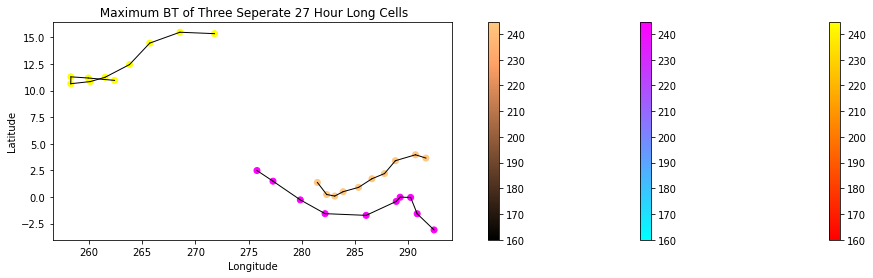

In [254]:
# create figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))

cell1 = gdf_tb_27[0:10]
cell2 = gdf_tb_27[10:20]
cell3 = gdf_tb_27[20:30]

ax.set_title(' Maximum BT of Three Seperate 27 Hour Long Cells')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


min_value = gdf_tb_27['minTB_cell'].min()
max_value = gdf_tb_27['maxTB_cell'].max()


ax = cell1.plot(column='maxTB_cell', cmap='autumn', legend=True, ax=ax, vmin=min_value, vmax=max_value)
ax2 = cell2.plot(column='maxTB_cell', cmap='cool', legend=True, ax=ax, vmin=min_value, vmax=max_value)
ax3 = cell3.plot(column='maxTB_cell', cmap='copper', legend=True, ax=ax, vmin=min_value, vmax=max_value)

# Connect the data points in each cell with lines
for cell in [cell1, cell2, cell3]:
    for i in range(len(cell) - 1):
        lon1, lat1 = cell.iloc[i]['geometry'].x, cell.iloc[i]['geometry'].y
        lon2, lat2 = cell.iloc[i + 1]['geometry'].x, cell.iloc[i + 1]['geometry'].y
        ax.plot([lon1, lon2], [lat1, lat2], color='black', linewidth=1)

plt.show()
#fig.savefig('maxBT.png', format='png', dpi=300)

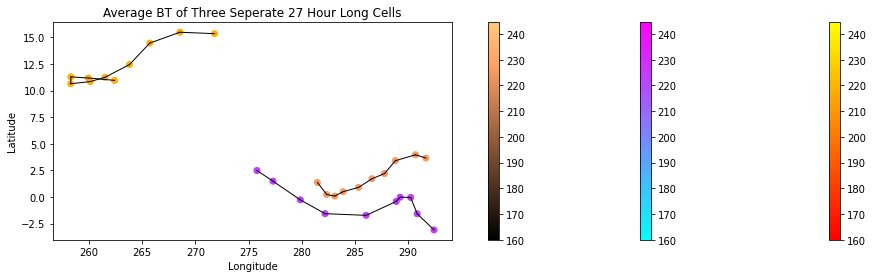

In [256]:
# create figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))

cell1 = gdf_tb_27[0:10]
cell2 = gdf_tb_27[10:20]
cell3 = gdf_tb_27[20:30]

ax.set_title('Average BT of Three Seperate 27 Hour Long Cells')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


min_value = gdf_tb_27['minTB_cell'].min()
max_value = gdf_tb_27['maxTB_cell'].max()


ax = cell1.plot(column='avgTB_cell', cmap='autumn', legend=True, ax=ax, vmin=min_value, vmax=max_value)
ax2 = cell2.plot(column='avgTB_cell', cmap='cool', legend=True, ax=ax, vmin=min_value, vmax=max_value)
ax3 = cell3.plot(column='avgTB_cell', cmap='copper', legend=True, ax=ax, vmin=min_value, vmax=max_value)

# Connect the data points in each cell with lines
for cell in [cell1, cell2, cell3]:
    for i in range(len(cell) - 1):
        lon1, lat1 = cell.iloc[i]['geometry'].x, cell.iloc[i]['geometry'].y
        lon2, lat2 = cell.iloc[i + 1]['geometry'].x, cell.iloc[i + 1]['geometry'].y
        ax.plot([lon1, lon2], [lat1, lat2], color='black', linewidth=1)


#fig.savefig('avgBT.png', format='png', dpi=300)

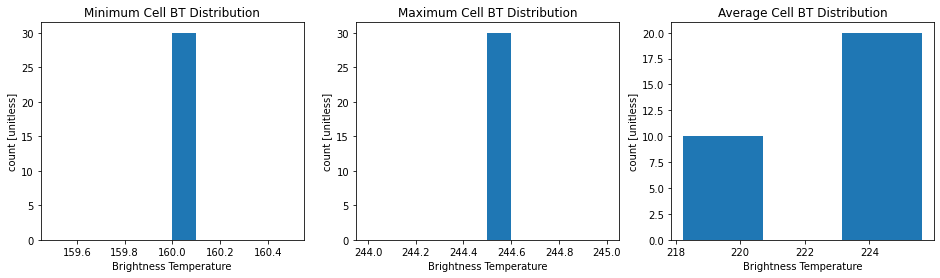

In [257]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))  
n = len(gdf_tb_27['minTB_cell'])
sqrt_n = int(n ** 0.5)

ax1.hist(test['minTB_cell'], bins=10)  
ax1.set_xlabel('Brightness Temperature')
ax1.set_ylabel('count [unitless]')
ax1.set_title('Minimum Cell BT Distribution')


ax2.hist(test['maxTB_cell'], bins=10)  
ax2.set_xlabel('Brightness Temperature')
ax2.set_ylabel('count [unitless]')
ax2.set_title('Maximum Cell BT Distribution')


ax3.hist(test['avgTB_cell'], bins=3)  
ax3.set_xlabel('Brightness Temperature')
ax3.set_ylabel('count [unitless]')
ax3.set_title('Average Cell BT Distribution')


#fig.savefig('DistBT.png', format='png', dpi=300)

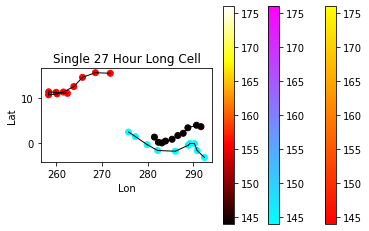

In [236]:
# Assuming you have an existing Matplotlib axis 'ax'
fig, ax = plt.subplots()

# Split your GeoDataFrame into three parts (cell1, cell2, and cell3)
cell1 = gdf_tb_27[0:10]
cell2 = gdf_tb_27[10:20]
cell3 = gdf_tb_27[20:30]

ax.set_title('Single 27 Hour Long Cell')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# Plot each cell with a different colormap
cell1.plot(column='minTB_cell', cmap='autumn', legend=True, ax=ax)
cell2.plot(column='minTB_cell', cmap='cool', legend=True, ax=ax)
cell3.plot(column='minTB_cell', cmap='hot', legend=True, ax=ax)


# Connect the data points in each cell with lines
for cell in [cell1, cell2, cell3]:
    for i in range(len(cell) - 1):
        lon1, lat1 = cell.iloc[i]['geometry'].x, cell.iloc[i]['geometry'].y
        lon2, lat2 = cell.iloc[i + 1]['geometry'].x, cell.iloc[i + 1]['geometry'].y
        ax.plot([lon1, lon2], [lat1, lat2], color='black', linewidth=1)

plt.show()


In [188]:
single_cell_test.plot(column='minTB_cell', cmap='viridis', legend=True, ax=ax)

<AxesSubplot:title={'center':'Single 27 Hour Long Cell'}, xlabel='Lon', ylabel='Lat'>

<Figure size 432x288 with 0 Axes>

In [189]:
## Checking to see how many unique cell values there are 
## This number indicates how many individual tracks there will be on the map

df_tb['cell'].nunique()

11489

In [190]:
outliers_TB = xr.Dataset.from_dataframe(df_TB)


NameError: name 'df_TB' is not defined

In [ ]:
outliers_TB